In [2]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024/

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import OneClassSVM

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
no_cv = '01.Dataset-Rofiqul/014_xgboost_evaluation_results.csv'
with_cv = '01.Dataset-Rofiqul/016_xgboost_crossval_evaluation_results.csv'

results_without_cv = pd.read_csv(no_cv)
results_with_cv = pd.read_csv(with_cv)

# Add a column to indicate whether cross-validation was used
results_without_cv['cross_validation'] = 'No'
results_with_cv['cross_validation'] = 'Yes'

In [6]:
# Combine the dataframes for comparison
combined_results = pd.concat([results_without_cv, results_with_cv])

# Display the combined results DataFrame
print(combined_results.head())

   test_size       mse      rmse       mae        r2 cross_validation   cv_mse
0       0.20  0.514919  0.717578  0.158607  0.561504               No      NaN
1       0.25  0.409857  0.640201  0.141192  0.571203               No      NaN
2       0.30  0.804049  0.896688  0.167968  0.084174               No      NaN
3       0.35  0.796063  0.892224  0.177232  0.442421               No      NaN
0       0.20  0.514919  0.717578  0.158607  0.561504              Yes  0.69339


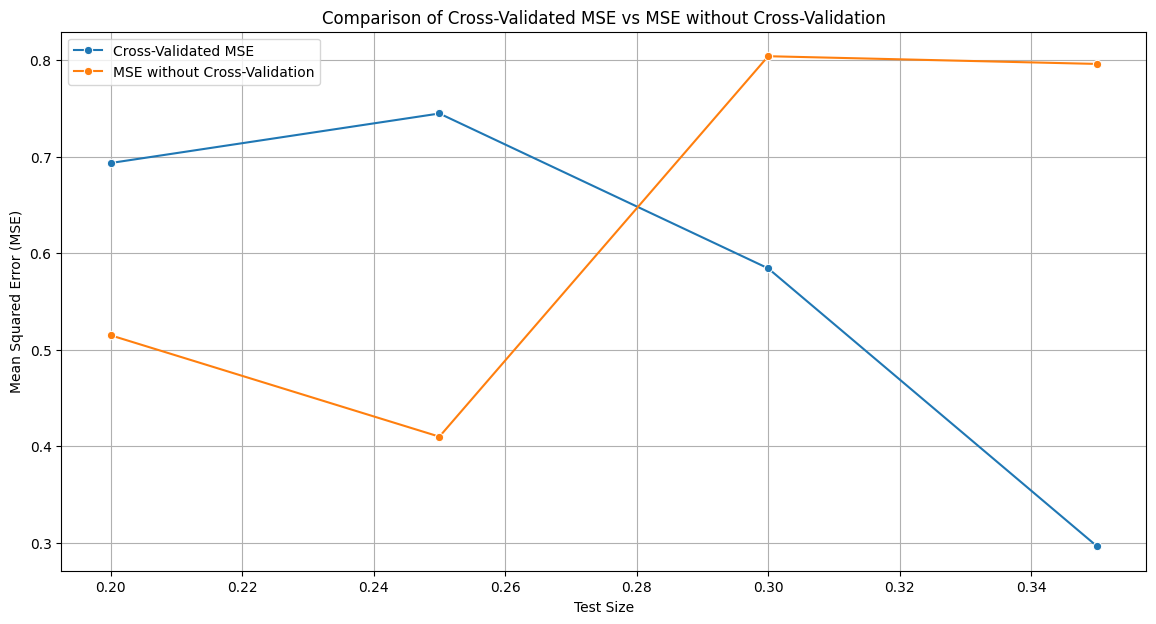

In [9]:
# Display the results DataFrame
results_with_cv.head()

# Visualize comparison of cv_mse vs mse
plt.figure(figsize=(14, 7))

# Plot cv_mse
sns.lineplot(x='test_size', y='cv_mse', data=results_with_cv, marker='o', label='Cross-Validated MSE')

# Plot mse
sns.lineplot(x='test_size', y='mse', data=results_with_cv, marker='o', label='MSE without Cross-Validation')

# Set plot title and labels
plt.title('Comparison of Cross-Validated MSE vs MSE without Cross-Validation')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/tmp/ipykernel_27527/431550836.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test_size', y='mse', data=results_with_cv, ax=axs[0], palette="Set2")
/tmp/ipykernel_27527/431550836.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test_size', y='cv_mse', data=results_with_cv, ax=axs[1], palette="Set1")


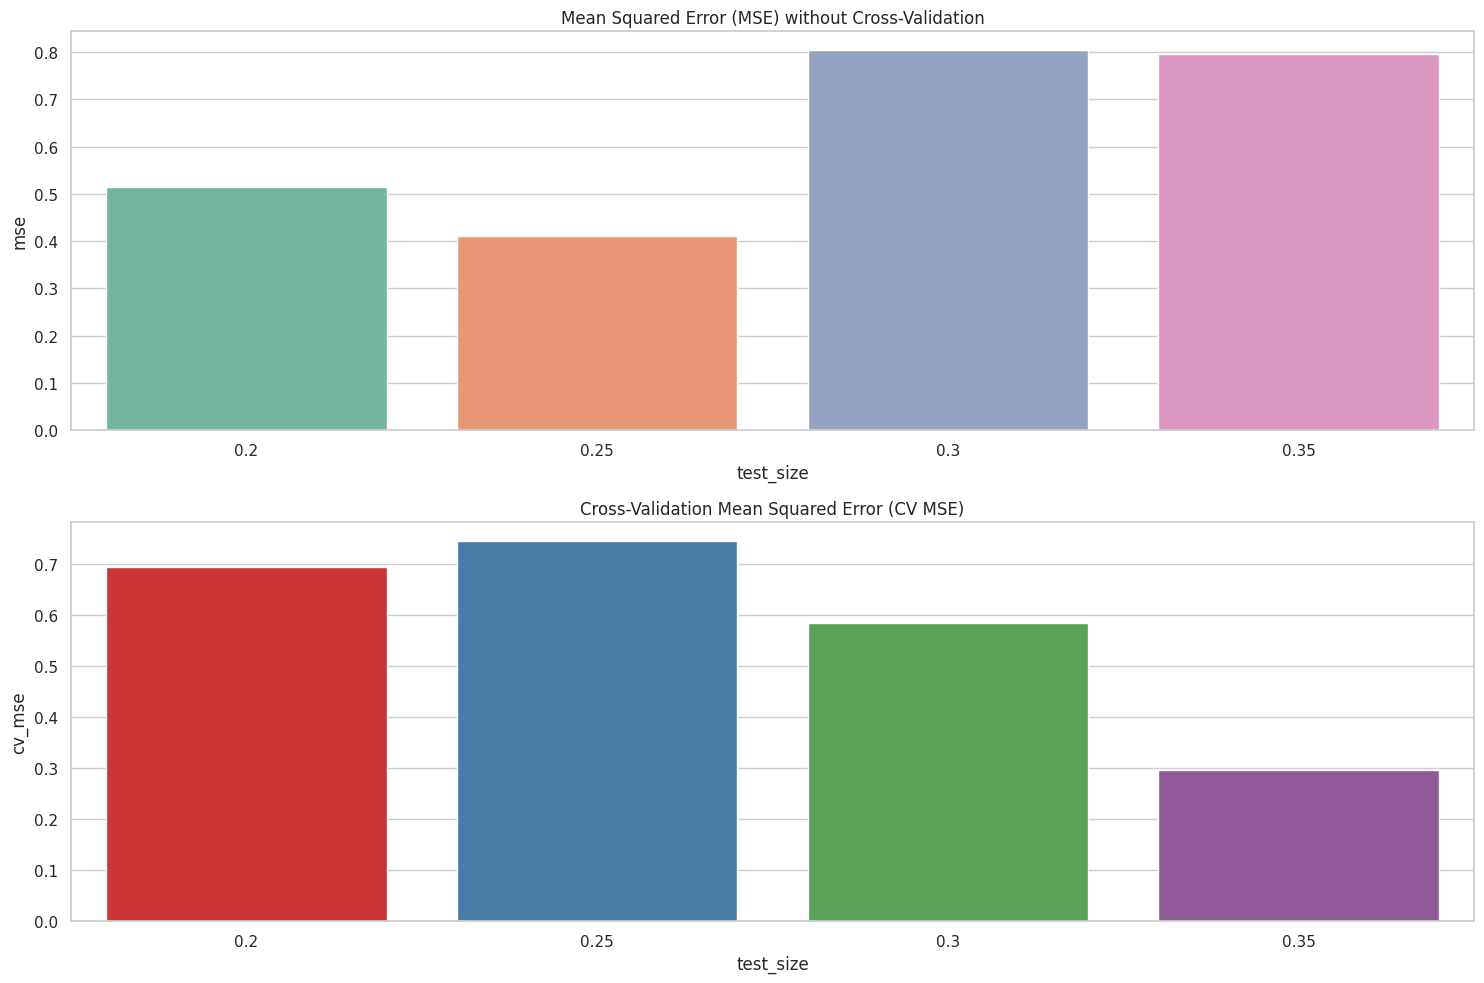

In [11]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot MSE without cross-validation
sns.barplot(x='test_size', y='mse', data=results_with_cv, ax=axs[0], palette="Set2")
axs[0].set_title('Mean Squared Error (MSE) without Cross-Validation')

# Plot CV_MSE with cross-validation
sns.barplot(x='test_size', y='cv_mse', data=results_with_cv, ax=axs[1], palette="Set1")
axs[1].set_title('Cross-Validation Mean Squared Error (CV MSE)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()